# Obtain the NASA airfoil self-noise dataset from UCI machine learning dataset repository. The dataset describes different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments. The following attributes were measured:
#i. Frequency, in Hz.
# ii. Angle of attack, in degrees.
# iii. Chord length, in meters.
# iv. Free-stream velocity, in meters per second.
#v. Suction side displacement thickness, in meters.
#The only measured output was:
#i. Scaled sound pressure level, in decibels.

a) Visualize the dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#!pip install ucimlrepo

In [4]:
from google.colab import drive
drive.mount("/content/drive")
file_path = ('/content/drive/MyDrive/Colab Notebooks/airfoil_self_noise.dat')

data = pd.read_csv(file_path, delimiter ='\t')

data.head()

Mounted at /content/drive


,800,0,0.3048,71.3,0.00266337,126.201
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


Brooks, T., Pope, D., & Marcolini, M. (1989). Airfoil Self-Noise [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5VW2C.

---



In [5]:
#Make pairplots of training data
data = pd.DataFrame(data)
data.columns = ["frequency",  "attack-angle", "chord-length", "free-stream-velocity", "suction-side-displacement-thicknes","scaled-sound-pressure"]
data.head()

,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thicknes,scaled-sound-pressure
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

x = data.iloc[:,0:-2].to_numpy()
y = data.iloc[:,-1].to_numpy()

#Split
x_train, x_test, y_train, y_test = train_test_split(
    x,y,
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True)

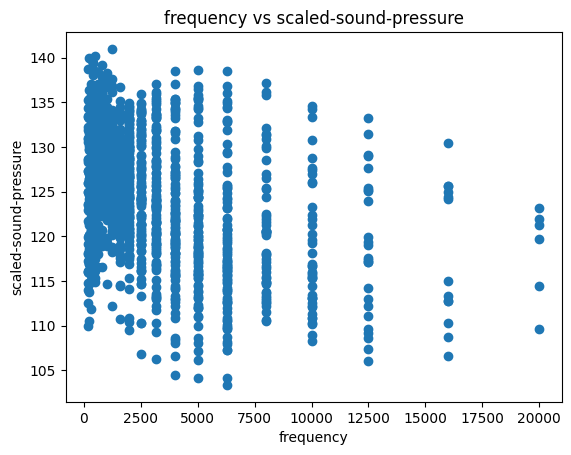

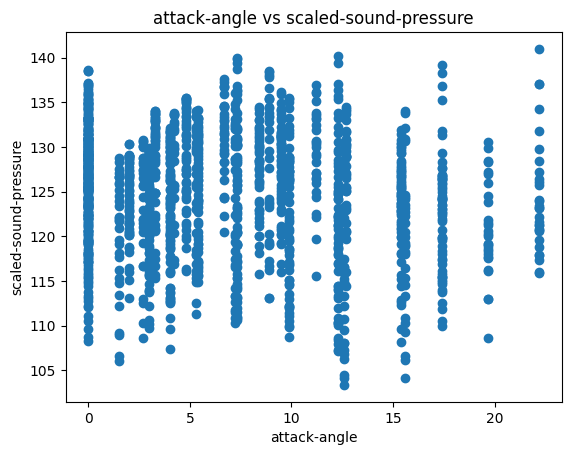

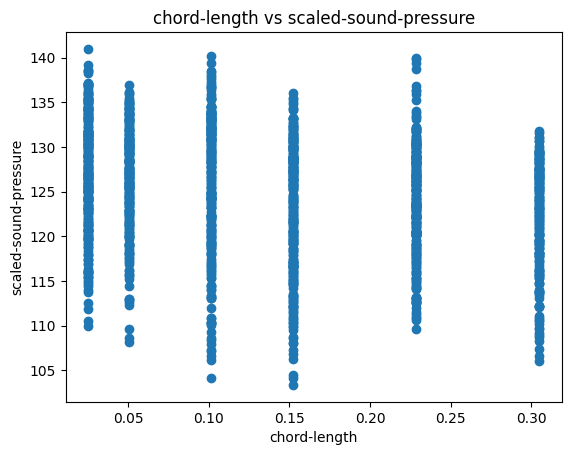

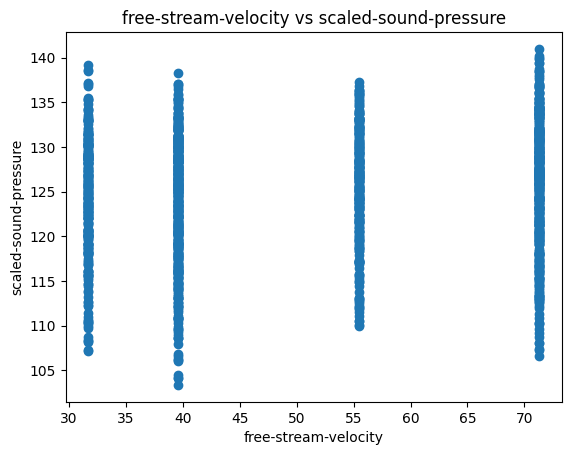

In [7]:
#Visualize
for i in range(0, x.shape[1]):
  plt.subplots();
  plt.scatter(data.iloc[:,i], data.iloc[:,-1])
  plt.title(str(data.columns[i] + " vs "+ data.columns[-1]))
  plt.xlabel(str(data.columns[i]))
  plt.ylabel(str(data.columns[-1]))

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1051, 4)
(1051,)
(451, 4)
(451,)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import tensorflow as tf
from keras import optimizers

x_train = x_train.astype(float)
x_test = x_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

model = Sequential()


#Add layers to neural network
model.add(Dense(200,  activation = 'relu', input_shape =(4,)))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(1))


mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.SUM)
opt = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = opt, loss = mse)
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 5789559.5000 - val_loss: 333299.8438
Epoch 2/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 266039.9062 - val_loss: 216497.4062
Epoch 3/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 190749.1875 - val_loss: 114337.9922
Epoch 4/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 76528.7344 - val_loss: 36147.4844
Epoch 5/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41347.5820 - val_loss: 35135.4062
Epoch 6/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 46720.5234 - val_loss: 50180.4688
Epoch 7/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 54901.4219 - val_loss: 42267.6406
Epoch 8/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 43291.4453 - val_loss: 36649.0781
Epoch 9/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 60994.8711 - val_loss: 36670.8945
Epoch 10/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42736.7734 - val_loss: 43683.1367
Epoch 11/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 200)                 │           1,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 80)                  │          16,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              81 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,485 (201.12 KB)

 Trainable params: 17,161 (67.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,324 (134.08 KB)

In [14]:
from sklearn.metrics import r2_score


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

predicted = model.predict(x_test)

(1051, 4)
(1051,)
(451, 4)
(451,)
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [15]:
r2 = r2_score(y_test, predicted.flatten())

print("The coefficient of determination is ", r2)

The coefficient of determination is  0.22020789273637909
